In [165]:
from bs4 import BeautifulSoup as bs
import requests
import camelot
import matplotlib.pyplot as plt

In [166]:
#fetch sourcecode for exracting the links
source = requests.get('https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports').text
soup = bs(source, 'lxml')

In [167]:
hits = [x for x in soup.find_all('div', class_='sf-content-block content-block')
          if x.find(text=re.compile("Situation"))]
#links = ['https://www.who.int'+i['href'] for i in hits[0].findAll('a', href=True)]
link = 'https://www.who.int'+hits[0].find('a', href=True)['href']
num = int(link.split('-')[4])

In [168]:
#fetch the pdf files
with open('report.pdf','wb') as f:
     f.write(requests.get(link, stream=True).content)

In [169]:
#extract all tabulars from one
pdfsAllTabs = camelot.read_pdf('report.pdf', pages='1-end')

In [170]:
for i,pdf in enumerate(pdfsAllTabs):
    #print(i+30)
    for j in pdf.df[0].iteritems():
        if j[1] == 'Germany':
            total = pdf.df[1][j[0]]
            new = pdf.df[2][j[0]]
            dead = pdf.df[3][j[0]]

print(total)
print(new)
print(dead)

795
156
0


In [171]:
with open('numbers.txt', 'r') as f:
    #numbers = [[int(i[:-1]) for i in f]
    inp = [[int(i[1:-2].split(',')[0]),
            int(i[1:-2].split(',')[1]),
            int(i[1:-2].split(',')[2]),
            int(i[1:-2].split(',')[3])]     for i in f]

In [172]:
if inp[-1][0] != num:
    inp.append([int(num),int(total),int(new),int(dead)])

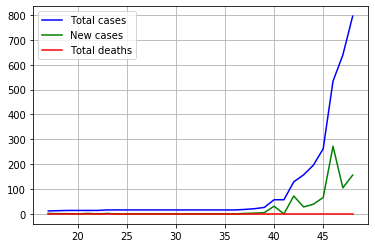

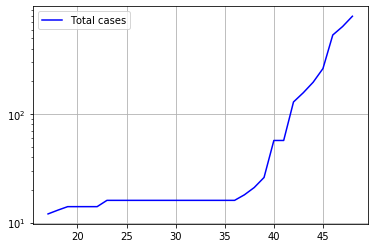

In [185]:
days = []
total = []
new = []
dead = []
for i in inp:
    days.append(i[0])
    total.append(i[1])
    new.append(i[2])
    dead.append(i[3])
plt.plot(days,total,'blue',label="Total cases")
plt.plot(days,new,'green',label="New cases")
plt.plot(days,dead,'red',label="Total deaths")
plt.grid('b')
#plt.yscale('log')
plt.legend()
plt.show()

plt.plot(days,total,'blue',label="Total cases")
plt.grid('b')
plt.yscale('log')
plt.legend()
plt.show()

In [174]:
with open('numbers.txt', 'w') as f:
    for item in inp:
        f.write("%s\n" % item)